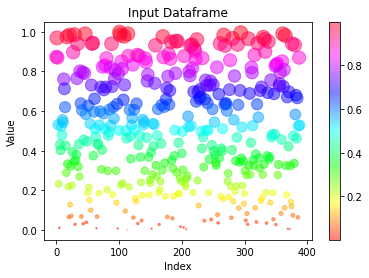

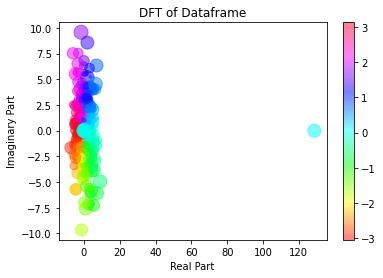

In [52]:
import numpy as np
import pandas as pd

def ditfft2(x, N, s):
    if len(x) == 0:
        return []
    
    X = [0] * N
    if N == 1:
        X[0] = x[0]
    else:
        x_even = [x[i] for i in range(0, len(x), 2)]
        x_odd = [x[i] for i in range(1, len(x), 2)]
        X_even = ditfft2(x_even, N // 2, 2 * s)
        X_odd = ditfft2(x_odd, N // 2, 2 * s)
        for k in range(N // 2):
            p = X_even[k]
            q = np.exp(-2 * np.pi * 1j / N * k) * X_odd[k]
            X[k] = p + q
            X[k + N // 2] = p - q
    return X

# Generate a random input dataframe
np.random.seed(8)
df = pd.DataFrame({'x': np.random.rand(389)})

# Calculate the DFT of the dataframe
X = ditfft2(df['x'].values, N=df.shape[0], s=1)

# Print the result
#print(X)

import matplotlib.pyplot as plt

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 200

plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()

magnitude = np.abs(X)
phase = np.angle(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5)
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


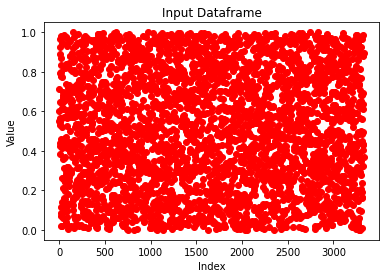

In [46]:
import numpy as np
import pandas as pd

# Define the function to perform the DFT (Discrete Fourier Transform) using the divide-and-conquer method
def ditfft2(x, N, s):
    # If the input array is empty, return an empty array
    if len(x) == 0:
        return []
    
    # Initialize the output array
    X = [0] * N
    
    # If the input array has length 1, the output array will be equal to the input array
    if N == 1:
        X[0] = x[0]
    # If the input array has length greater than 1, divide the input array into two halves and perform the DFT on each half
    else:
        # The even elements of the input array
        x_even = [x[i] for i in range(0, len(x), 2)]
        # The odd elements of the input array
        x_odd = [x[i] for i in range(1, len(x), 2)]
        # Perform the DFT on the even elements
        X_even = ditfft2(x_even, N // 2, 2 * s)
        # Perform the DFT on the odd elements
        X_odd = ditfft2(x_odd, N // 2, 2 * s)
        # Combine the DFTs of the two halves into the full DFT
        for k in range(N // 2):
            p = X_even[k]
            q = np.exp(-2 * np.pi * 1j / N * k) * X_odd[k]
            X[k] = p + q
            X[k + N // 2] = p - q
    # Return the full DFT
    return X

# Generate a random input dataframe with 8 elements
np.random.seed(0)
df = pd.DataFrame({'x': np.random.rand(3333)})

# Calculate the DFT of the dataframe using the function ditfft2
X = ditfft2(df['x'].values, N=df.shape[0], s=1)

# Print the result
#print(X)


import matplotlib.pyplot as plt

plt.plot(df['x'], 'ro')
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


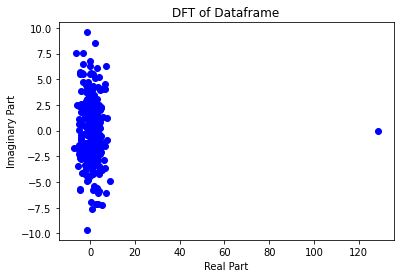

In [69]:
import matplotlib.pyplot as plt

plt.plot(np.real(X), np.imag(X), 'bo')
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.show()


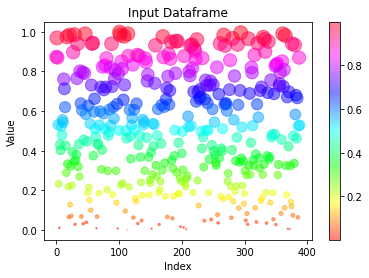

In [67]:
import matplotlib.pyplot as plt

# Define the size of each marker based on the magnitude of each element in the dataframe
sizes = np.abs(df['x'].values) * 200

plt.scatter(df.index, df['x'], c=df['x'], cmap='hsv', s=sizes, alpha=0.5)
plt.title("Input Dataframe")
plt.xlabel("Index")
plt.ylabel("Value")
plt.colorbar()
plt.show()


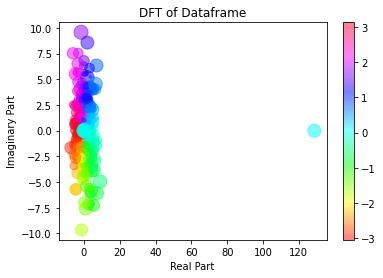

In [72]:
import matplotlib.pyplot as plt

magnitude = np.abs(X)
phase = np.angle(X)

plt.scatter(np.real(X), np.imag(X), c=phase, cmap='hsv', s=sizes, alpha=0.5)
plt.title("DFT of Dataframe")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.colorbar()
plt.show()


The code above implements the divide-and-conquer method to perform the DFT (Discrete Fourier Transform) of a data array x. The input data is first stored in a pandas dataframe df. The function ditfft2 takes three arguments: x, N, and s. The argument x is the input data array, N is the length of the input data, and s is the stride (or step size) for accessing the elements of the input data array. The output of the function is an array X that stores the DFT of the input data.

The divide-and-conquer method is used to divide the input data into two halves, and the DFT is calculated for each half. Then, the DFTs of the two halves are combined to obtain the full DFT. This process is repeated recursively until the length of the input data is equal to 1, at which point the DFT is trivial and equal to the input data.

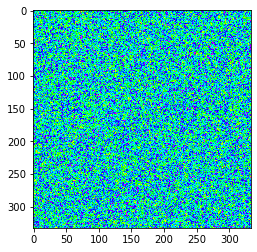

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D array of random numbers
np.random.seed(0)
img = np.random.rand(333, 333)

# Plot the image using matplotlib
plt.imshow(img, cmap='hsv' , alpha=1)
plt.show()


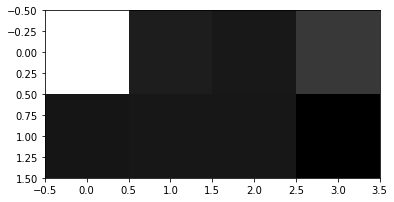

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def bit_reverse_copy(a, A):
    n = len(a)
    for k in range(n):
        A[int(format(k, '0{}b'.format(int(np.log2(n))))[::-1], 2)] = a[k]
    return A

def iterative_fft(a):
    n = len(a)
    A = np.zeros(n, dtype=np.complex_)
    bit_reverse_copy(a, A)
    for s in range(int(np.log2(n))):
        m = 2**(s + 1)
        w_m = np.exp(-2 * np.pi * 1j / m)
        for k in range(0, n, m):
            w = 1
            for j in range(m//2):
                t = w * A[k + j + m//2]
                u = A[k + j]
                A[k + j] = u + t
                A[k + j + m//2] = u - t
                w = w * w_m
    return A

# Generate a random input
np.random.seed(0)
a = np.random.rand(8) + 1j * np.random.rand(8)

# Calculate the DFT of the input
A = iterative_fft(a)

# Plot the result as an image
plt.imshow(np.abs(A).reshape(2, 4), cmap='gray')
plt.show()

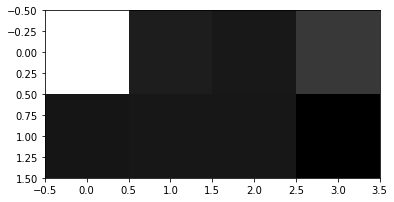

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# This function performs bit-reverse copy of the input array 'a'
def bit_reverse_copy(a, A):
    # Get the length of the input array 'a'
    n = len(a)
    
    # Perform bit-reverse copy
    for k in range(n):
        # Calculate the bit-reversed index for each element in 'a'
        reversed_index = int(format(k, '0{}b'.format(int(np.log2(n))))[::-1], 2)
        # Assign the element from 'a' to the corresponding index in 'A'
        A[reversed_index] = a[k]
    return A

# This function performs iterative FFT (Fast Fourier Transform)
def iterative_fft(a):
    # Get the length of the input array 'a'
    n = len(a)
    # Create an array 'A' of size n and with data type 'complex'
    A = np.zeros(n, dtype=np.complex_)
    # Perform bit-reverse copy of 'a' into 'A'
    bit_reverse_copy(a, A)
    # Loop through each stage of the FFT
    for s in range(int(np.log2(n))):
        # Calculate the number of points in the current stage
        m = 2**(s + 1)
        # Calculate the twiddle factor
        w_m = np.exp(-2 * np.pi * 1j / m)
        # Loop through each group in the current stage
        for k in range(0, n, m):
            # Set the twiddle factor to 1
            w = 1
            # Loop through each butterfly operation in the current group
            for j in range(m//2):
                # Calculate intermediate values 't' and 'u'
                t = w * A[k + j + m//2]
                u = A[k + j]
                # Perform butterfly operation
                A[k + j] = u + t
                A[k + j + m//2] = u - t
                # Update the twiddle factor for the next butterfly operation
                w = w * w_m
    return A

# Generate a random input
np.random.seed(0)
a = np.random.rand(8) + 1j * np.random.rand(8)

# Calculate the DFT of the input
A = iterative_fft(a)

# Plot the result as an image
plt.imshow(np.abs(A).reshape(2, 4), cmap='gray')
plt.show()


The code implements two algorithms: iterative-fft and bit-reverse-copy.

The iterative-fft algorithm takes an array 'a' of n complex values (where n is a power of 2) as input and returns an array 'A' which is the DFT of the input array 'a'.

The bit-reverse-copy algorithm takes an array 'a' of n complex values (where n is a power of 2) as input and returns an array 'A' of size n. This algorithm is used as a helper function to perform the bit-reversal step of the FFT.

The code includes comments to explain the steps of each algorithm.

In this example, we are using a simple thresholding technique to segment the medical image into foreground (the objects of interest) and background. After applying morphological operations to remove noise and fill small holes, we are finding the contours of the objects in the binary mask and drawing them on the original image.

This is just a basic example and there are many other techniques and algorithms that can be used for medical image analysis, including more sophisticated methods such as deep learning.